In [63]:
import pandas as pd
import os
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [54]:
def get_chile():
    df = pd.read_csv(os.path.join("data", "Chile.csv"), parse_dates = ["Periodo"])
    df['Periodo'] = pd.to_datetime(df['Periodo'], format='%m-%Y')
    df.set_index('Periodo', inplace = True)
    df = df.loc["1990":]
    df = pd.DataFrame(df['1.IPC General'])
    df.columns = ['Chile']
    return df

def get_world():
    df = pd.read_csv(os.path.join("data", "Mundo.csv"), parse_dates = ["Periodo"])
    df['Periodo'] = pd.to_datetime(df['Periodo'], format='%m-%Y')
    df.set_index('Periodo', inplace = True)
    df.columns = ['United States', 'United Kingdom', 'Japan',
           'Euro Zone', 'South Korea', 'China', 'Malasia', '8.Polonia',
           'Czech Republic', 'Russia', 'Tailand', 'Argentina',
           'Brasil', 'Colombia', 'Mexico', '16.Peru']

    return df

In [57]:
df = pd.concat([get_chile(), get_world()], axis='columns')
df

,Chile,United States,United Kingdom,Japan,Euro Zone,South Korea,China,Malasia,8.Polonia,Czech Republic,Russia,Tailand,Argentina,Brasil,Colombia,Mexico,16.Peru
Periodo,,,,,,,,,,,,,,,,,
1990-01-01,23.1,5.2,5.7,3.0,NaN,7.3,4.3,NaN,NaN,NaN,NaN,5.91,NaN,"2,426.12",26.69,22.48,NaN
1990-02-01,23.3,5.3,5.9,3.6,NaN,7.6,4.4,NaN,NaN,NaN,NaN,5.64,NaN,"3,701.29",27.12,23.57,NaN
1990-03-01,23.9,5.2,6.0,3.5,NaN,8.0,3.4,NaN,NaN,NaN,NaN,6.02,NaN,"6,390.53",27.63,24.40,NaN
1990-04-01,24.8,4.7,6.4,2.5,NaN,8.7,3.2,NaN,NaN,NaN,NaN,6.83,NaN,"6,821.31",27.98,24.43,NaN
1990-05-01,24.3,4.4,6.8,2.7,NaN,8.6,2.7,NaN,NaN,NaN,NaN,6.60,NaN,"6,214.99",28.24,24.89,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,3.0,1.2,0.7,-0.4,-0.3,0.1,0.5,-1.5,3.1,2.9,4.00,-0.50,37.2,3.92,1.75,4.09,1.72
2020-11-01,2.7,1.2,0.3,-0.9,-0.3,0.6,-0.5,-1.7,3.0,2.7,4.40,-0.41,35.8,4.31,1.49,3.33,2.14
2020-12-01,3.0,1.4,0.6,-1.2,-0.3,0.5,0.2,-1.4,2.4,2.3,4.90,-0.27,36.1,4.52,1.61,3.15,1.97


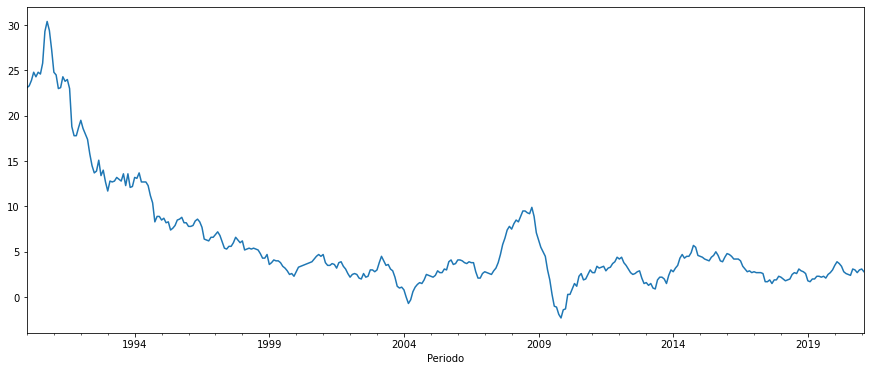

In [62]:
df['Chile'].plot(figsize=(15,6))

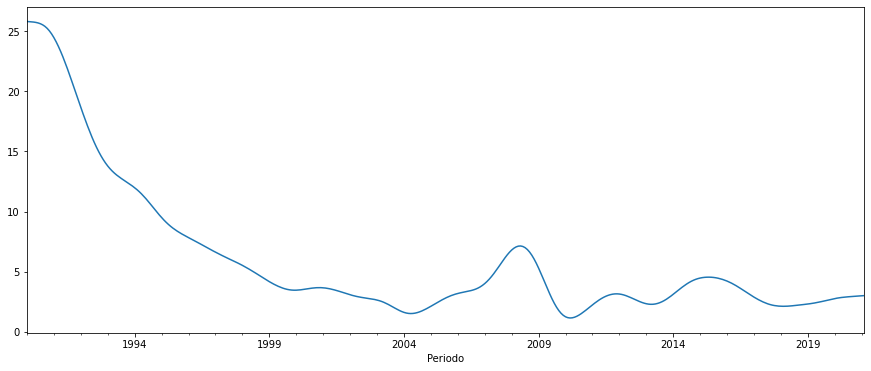

In [60]:
from statsmodels.tsa.filters.hp_filter import hpfilter

EXINUS_cycle, EXINUS_trend = hpfilter(df['Chile'], lamb=1600)
EXINUS_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)

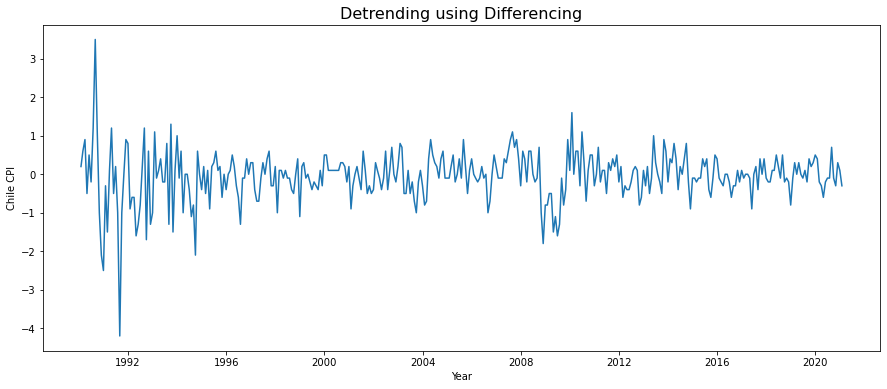

In [64]:
diff = df['Chile'].diff()
plt.figure(figsize=(15,6))
plt.plot(diff)
plt.title('Detrending using Differencing', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Chile CPI')
plt.show()

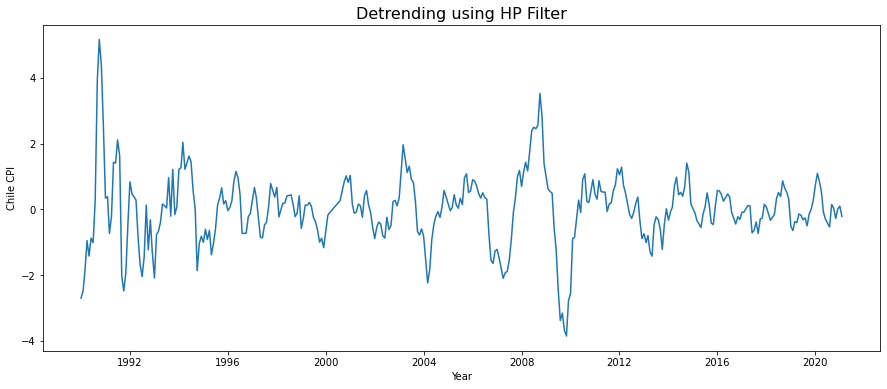

In [65]:
from statsmodels.tsa.filters.hp_filter import hpfilter

EXINUS_cycle, EXINUS_trend = hpfilter(df['Chile'], lamb=1600)
df['trend'] = EXINUS_trend
detrended = df['Chile'] - df['trend']
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.title('Detrending using HP Filter', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Chile CPI')
plt.show()

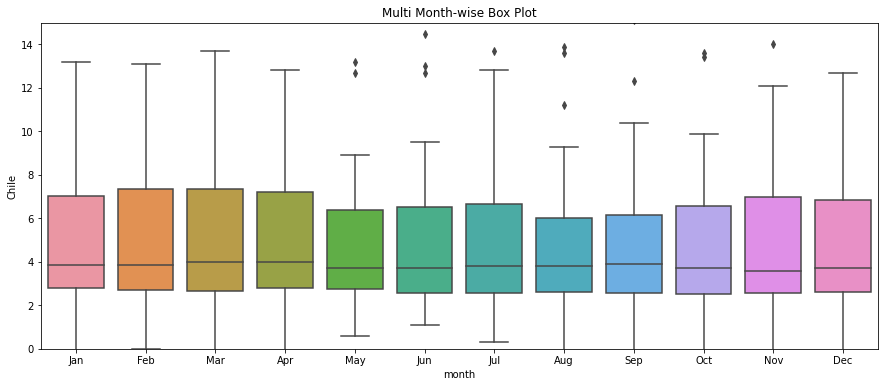

In [70]:
import seaborn as sns

df['month'] = df.index.strftime('%b')
df['year'] = [d.year for d in df.index]
df['month'] = [d.strftime('%b') for d in df.index]
years = df['year'].unique()
plt.figure(figsize=(15,6))
plt.ylim(top=15)
sns.boxplot(x='month', y='Chile', data=df).set_title("Multi Month-wise Box Plot")
plt.show()

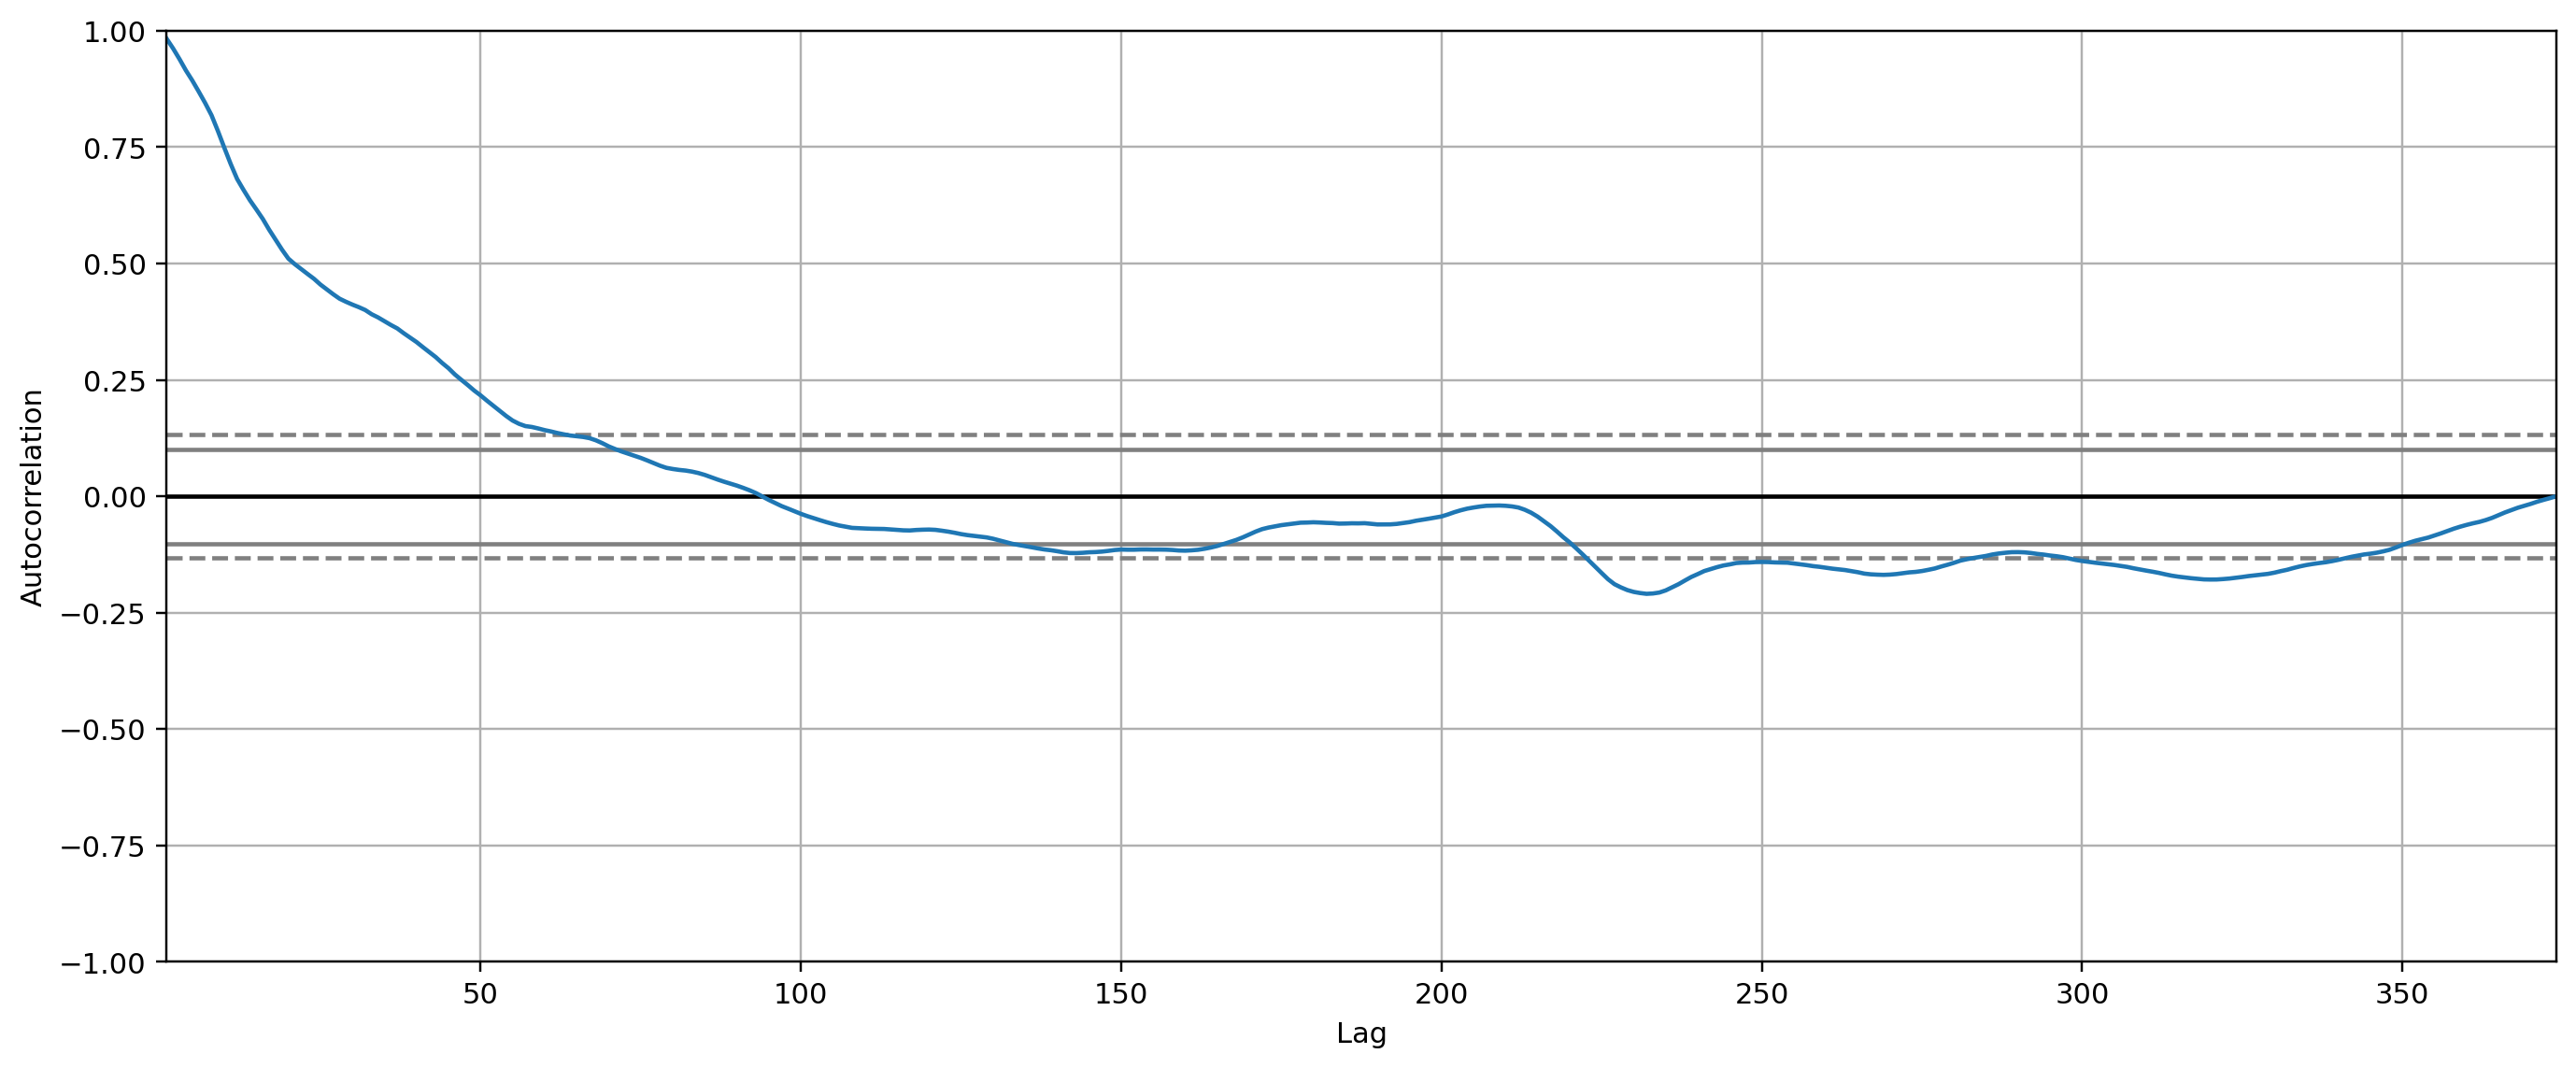

In [75]:
from pandas.plotting import autocorrelation_plot
import pandas as pd
plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':220})
autocorrelation_plot(df['Chile'].tolist())

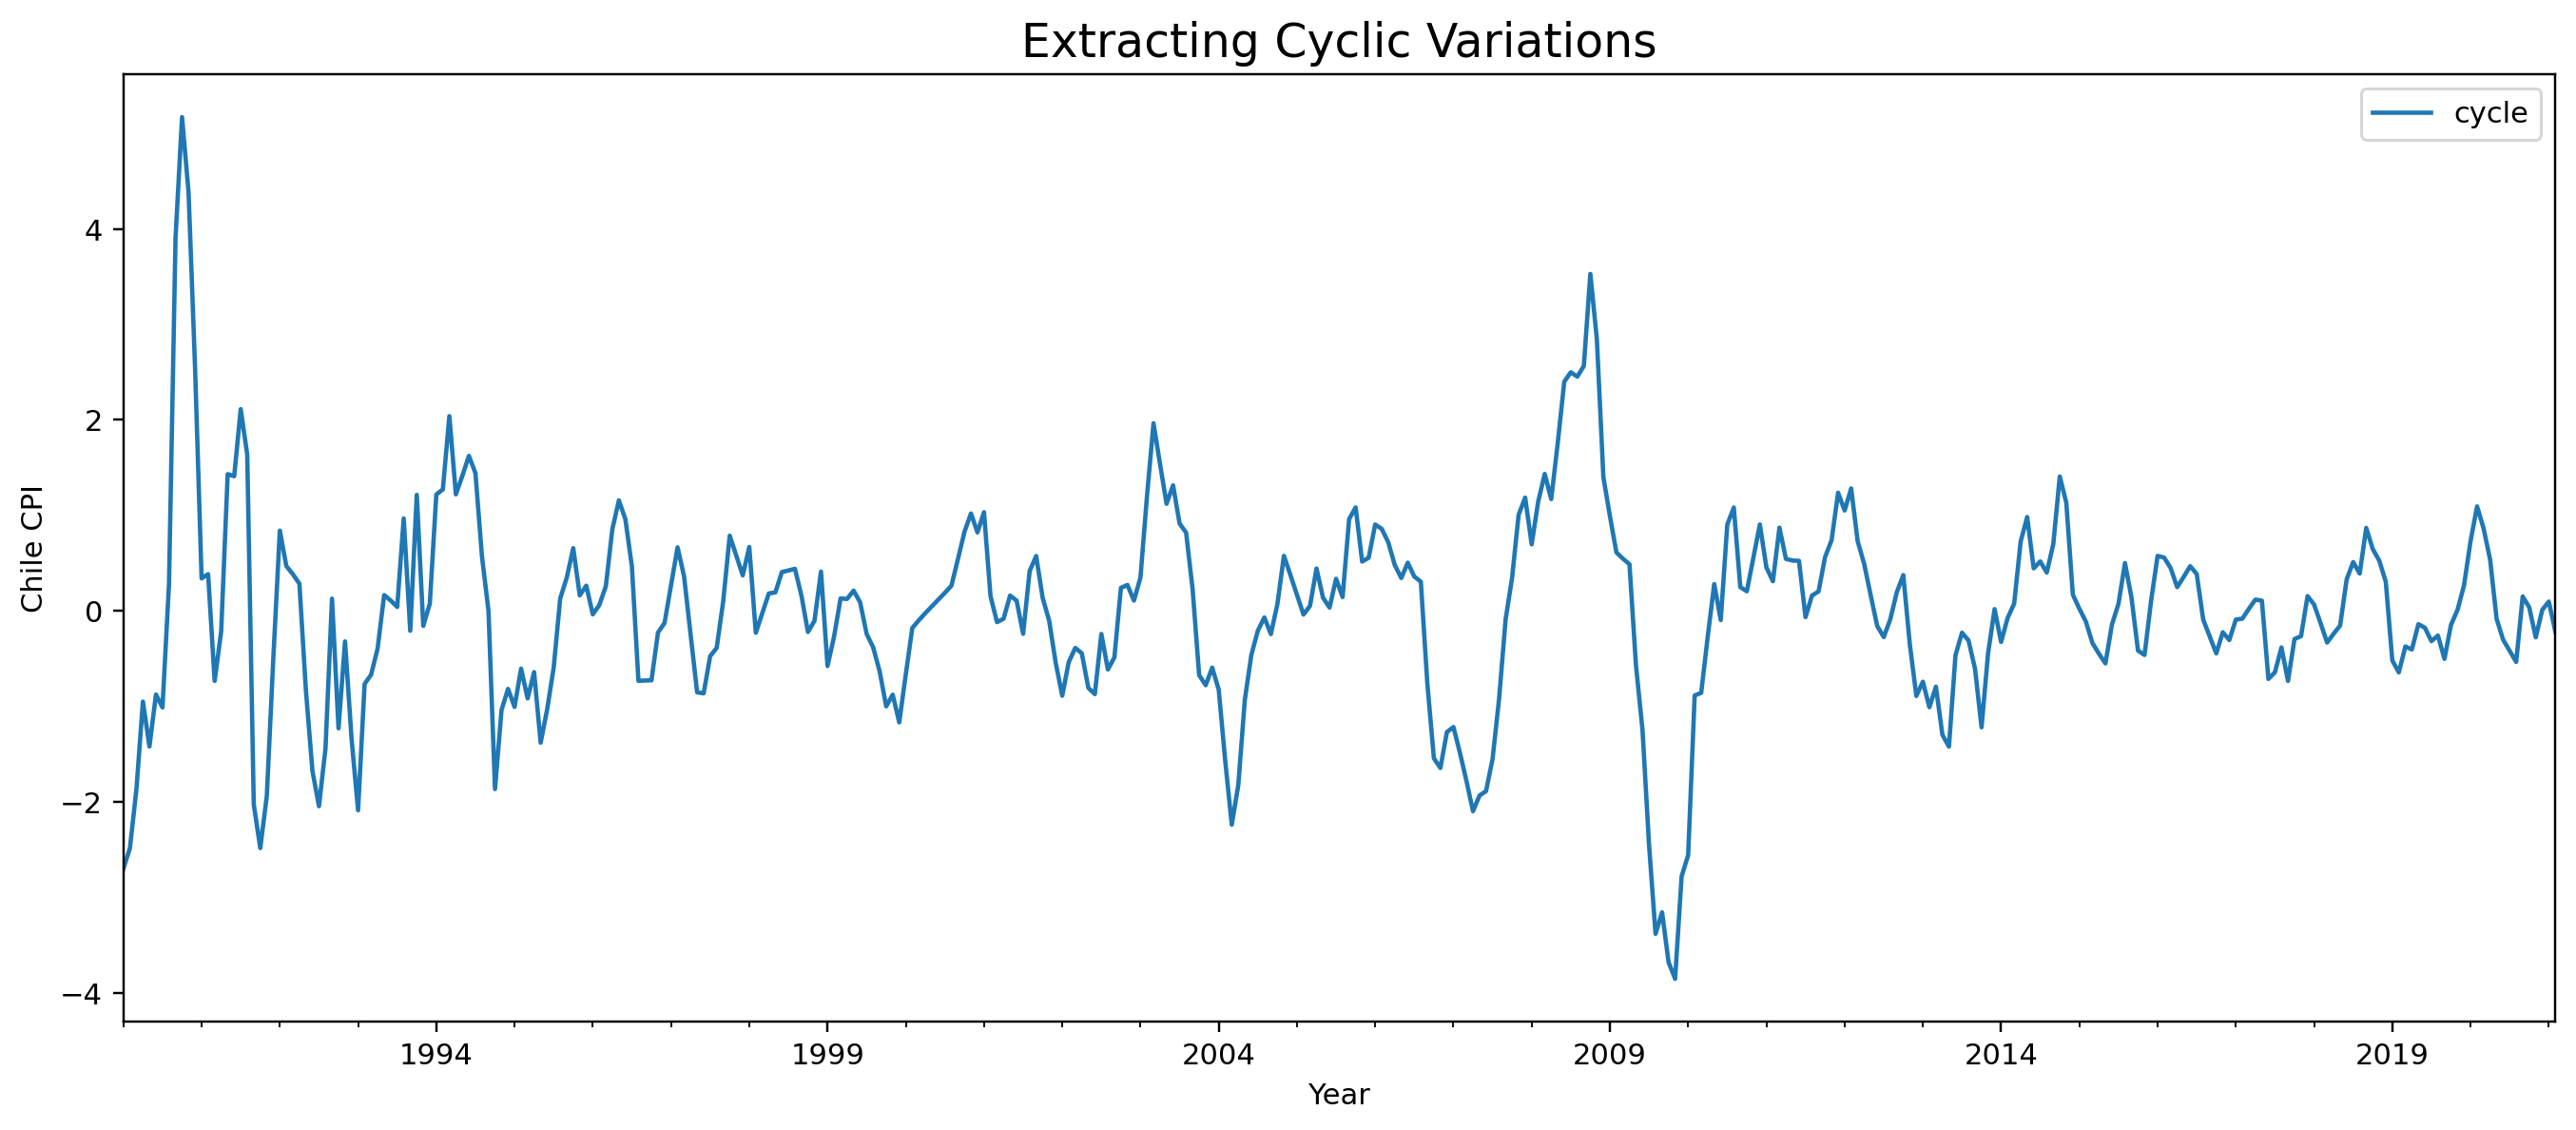

In [77]:
from statsmodels.tsa.filters.hp_filter import hpfilter

CHL_cycle, CHL_trend = hpfilter(df['Chile'], lamb=1600)
df['cycle'] =CHL_cycle
df['trend'] =CHL_trend
df[['cycle']].plot(figsize=(15,6)).autoscale(axis='x',tight=True)
plt.title('Extracting Cyclic Variations', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Chile CPI')
plt.show()